In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.inspection import PartialDependenceDisplay

In [3]:
os.chdir('../')

In [4]:
with open('models/clf/model.pkl', 'rb') as file:
    clf = pkl.load(file)

In [5]:
data = pd.read_csv('data/processed/clf/data.csv')

In [6]:
X, y = data.drop('Estado al egreso', axis=1), data['Estado al egreso']

### Voronoi Based Decision Boundary 2d Visualization

In [7]:
X_features = X[['Trastorno de consciencia', 'Ilg']].to_numpy()

In [8]:
y_pred = clf.predict(X)

In [9]:
vor = Voronoi(X_features)

Text(0.5, 1.0, 'Voronoi-based Decision Boundary Visualization')

<Figure size 1000x600 with 0 Axes>

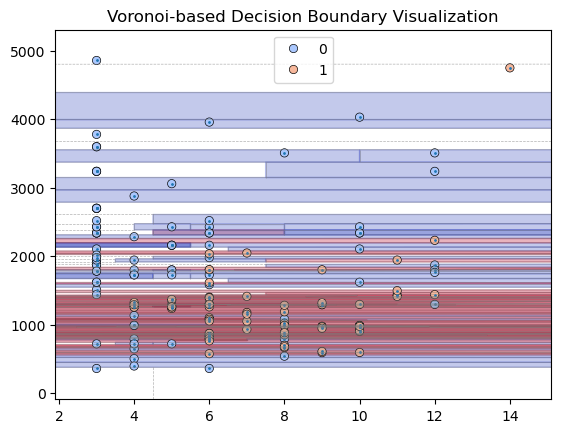

In [10]:
plt.figure(figsize=(10, 6))
voronoi_plot_2d(vor, show_vertices=False, line_colors='gray', line_width=0.5, line_alpha=0.6, point_size=2)

for region, pred in zip(vor.point_region, y_pred):
    if -1 not in vor.regions[region]:
        polygon = [vor.vertices[i] for i in vor.regions[region]]
        plt.fill(*zip(*polygon), alpha=0.3, color=sns.color_palette("coolwarm", as_cmap=True)(pred / max(y)))

sns.scatterplot(x=X_features[:, 0], y=X_features[:, 1], hue=y.to_numpy(), palette="coolwarm", edgecolor='k')

plt.title("Voronoi-based Decision Boundary Visualization")

### Predictions with Partial Dependence Plots (PDPs)

This plot shows the partial dependence of the predicted probability of "Estado de Egreso" (1) on the feature 'Ilg'. It helps to visualize how the model's prediction changes as "Ilg" varies, while keeping other features constant.


In [36]:
ilg_index = X.columns.get_loc('Ilg')

Text(0.5, 0, 'ILG')

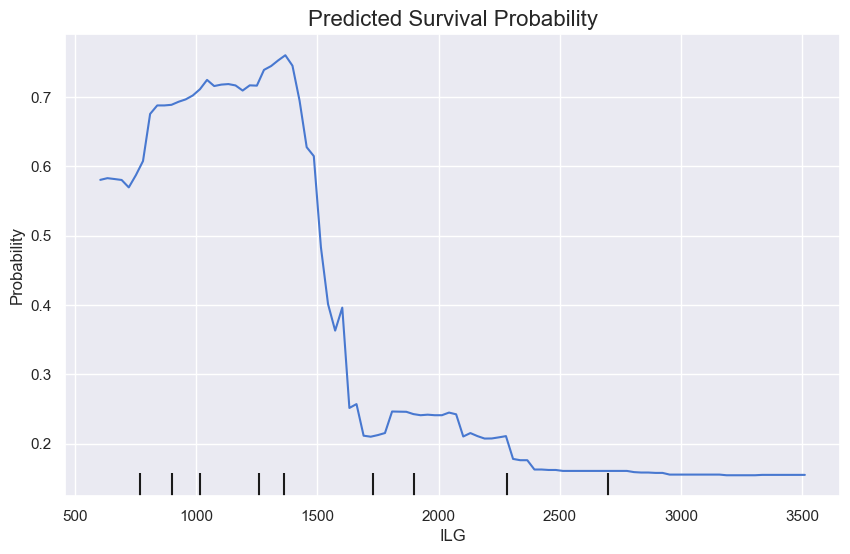

In [35]:

sns.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(10, 6))

PartialDependenceDisplay.from_estimator(clf, X, features=[ilg_index], feature_names=X.columns, target=1, ax=ax)

plt.title('Predicted Survival Probability', fontsize=16)
plt.ylabel('Probability')
plt.xlabel('ILG')